In [120]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('C:/Users/Аскар/Downloads/data.csv')

In [121]:
df.head()

price  min_to_metro region_of_moscow  total_area  living_area  floor  \
0  31633073.0          24.0              ЮАО        64.2         32.4   11.0   
1  29293000.0           9.0             СВАО        78.1          NaN    9.0   
2  30349669.0           5.0              ЮАО        72.4         33.6    3.0   
3  31845511.0          19.0              ЮАО        69.2          NaN    2.0   
4  38810000.0          27.0              ЗАО        66.9         24.8    9.0   

   number_of_floors  construction_year  is_new  is_apartments  ceiling_height  \
0              16.0             2023.0     1.0            0.0            3.15   
1              27.0             2022.0     1.0            0.0             NaN   
2              24.0             2023.0     1.0            0.0            3.15   
3              12.0             2024.0     1.0            0.0            2.97   
4              14.0             2023.0     1.0            0.0            3.00   

   number_of_rooms                                      link  
0                2  https://www.cian.ru/sale/flat/293204033/  
1                2  https://www.cian.ru/sale/flat/294033524/  
2                2  https://www.cian.ru/sale/flat/300712697/  
3                2  https://www.cian.ru/sale/flat/300228448/  
4                2  https://www.cian.ru/sale/flat/299262105/

In [ ]:
#МАТРИЦА КОРРЕЛЯЦИИ

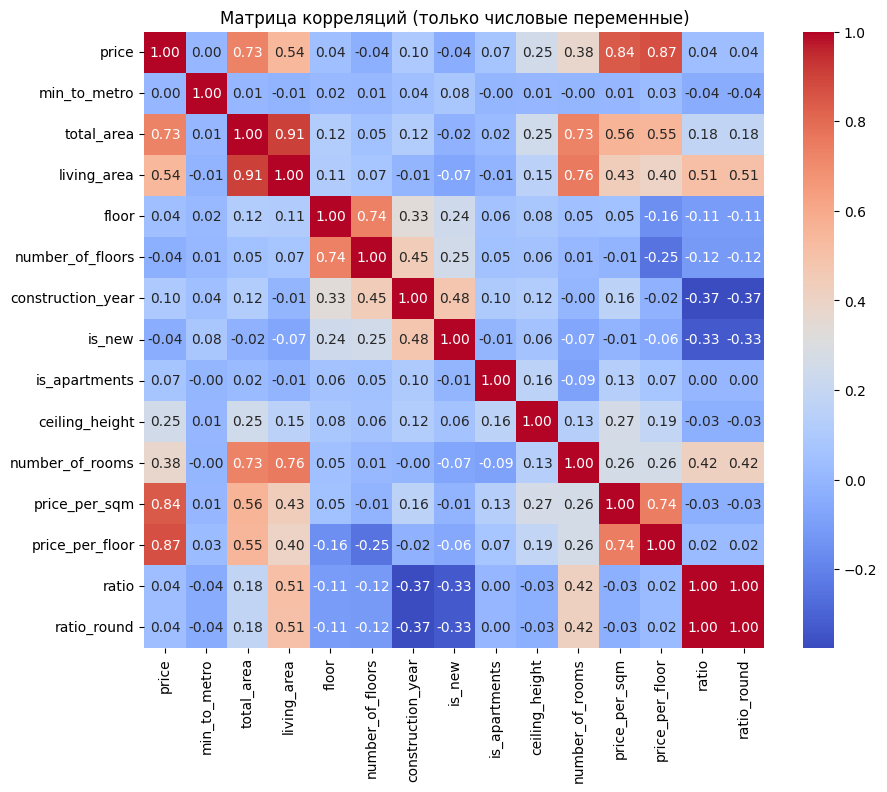

In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляций (только числовые переменные)")
plt.show()


In [208]:
max_rooms = df['number_of_rooms'].max()
print("Максимальное значение количества комнат:", max_rooms)


Максимальное значение количества комнат: 4


In [ ]:
#ПРОЦЕНТНОЕ СООТНОШЕНИЕ

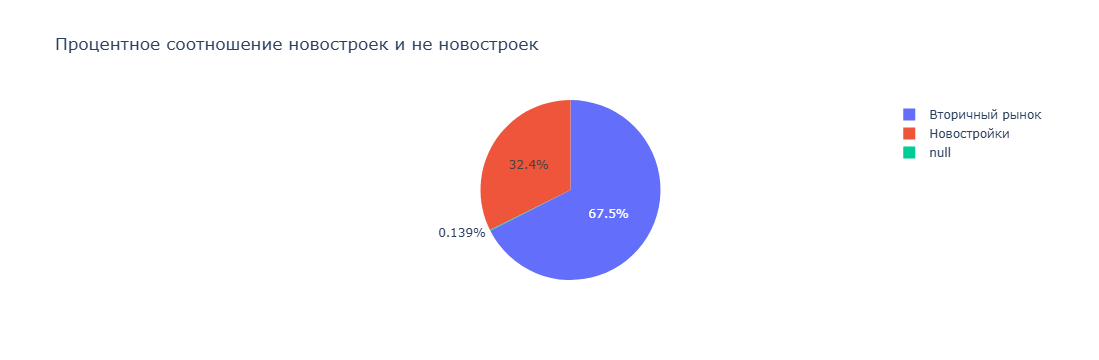

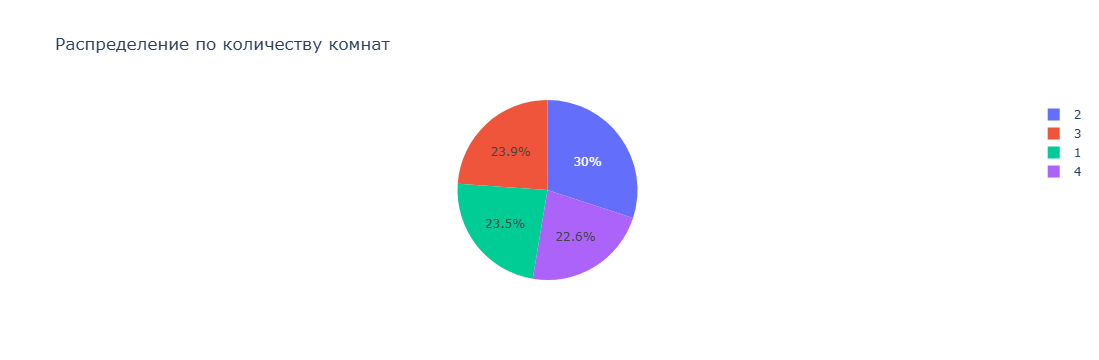

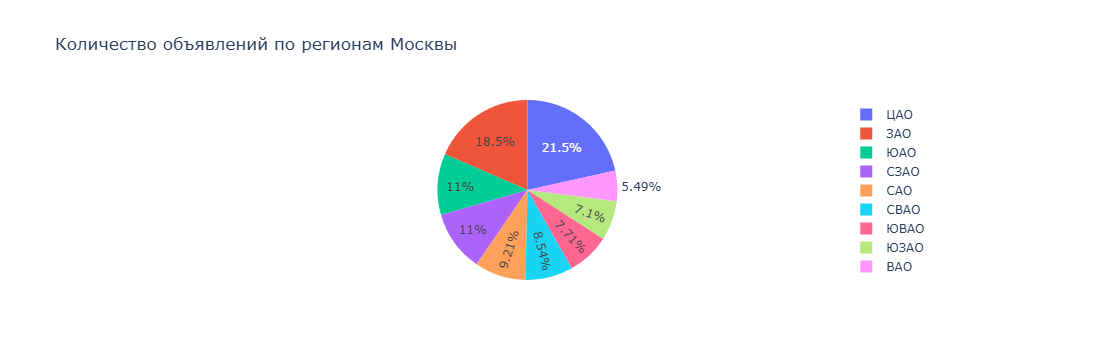

In [207]:
import plotly.express as px
import pandas as pd

df['is_new_label'] = df['is_new'].map({1: 'Новостройки', 0: 'Вторичный рынок'})

fig_is_new = px.pie(
    df, 
    names='is_new_label',
    title='Процентное соотношение новостроек и не новостроек'
)
fig_is_new.show()

rooms_count = df['number_of_rooms'].value_counts().reset_index()
rooms_count.columns = ['number_of_rooms', 'count']

fig_rooms = px.pie(
    rooms_count,
    names='number_of_rooms',
    values='count',
    title='Распределение по количеству комнат'
)
fig_rooms.show()

region_count = df['region_of_moscow'].value_counts().reset_index()
region_count.columns = ['region_of_moscow', 'count']

fig_regions = px.pie(
    region_count,
    names='region_of_moscow',
    values='count',
    title='Количество объявлений по регионам Москвы'
)
fig_regions.show()


In [122]:
# РАСПРЕДЕЛЕНИЕ ЦЕН

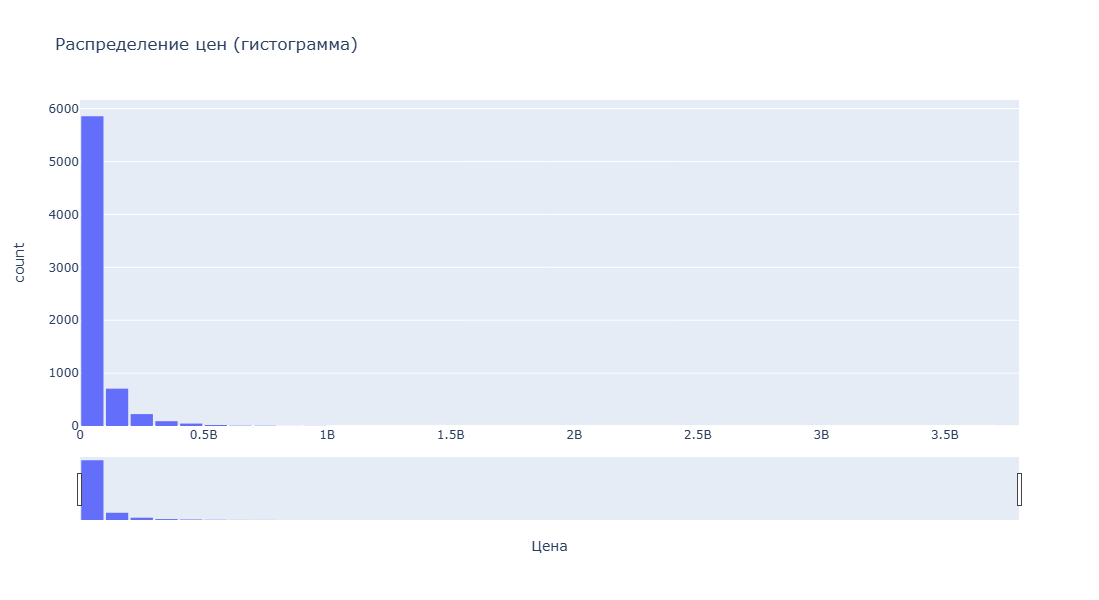

In [123]:
fig = px.histogram(df, x='price', 
                   nbins=50, 
                   title='Распределение цен (гистограмма)',
                   labels={'price': 'Цена'},
                   width=1100,
                   height=600
                  )
fig.update_layout(bargap=0.1)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()


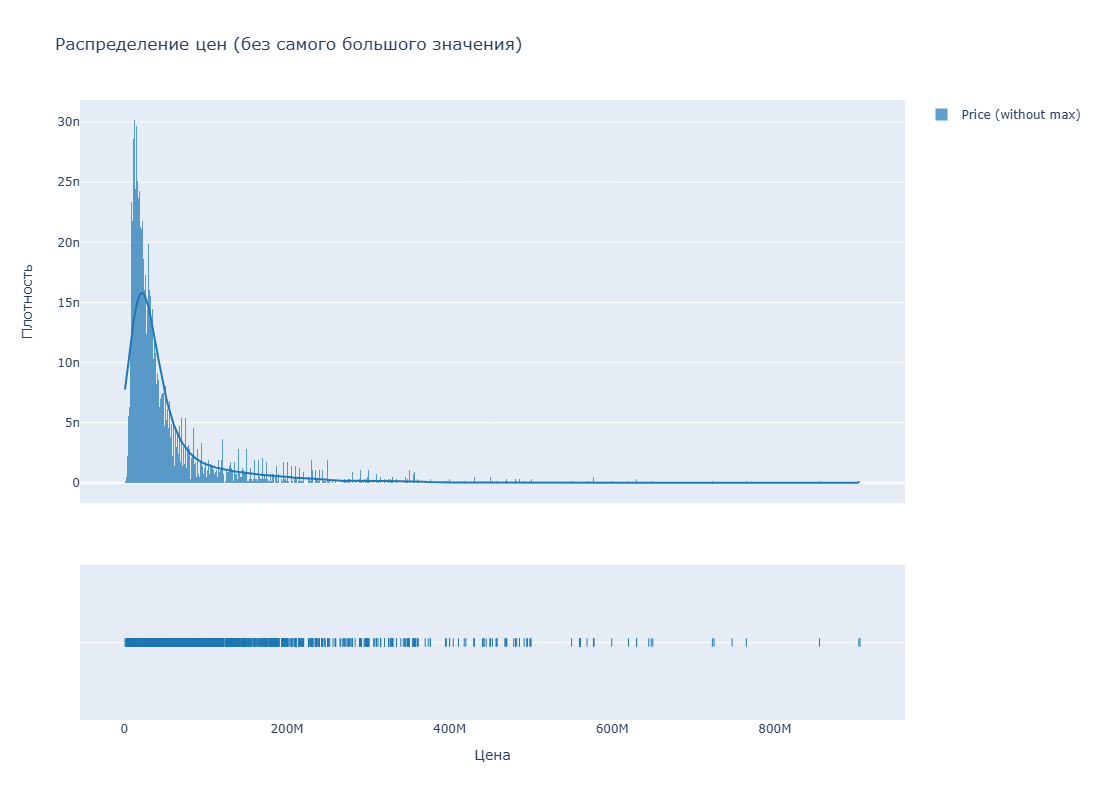

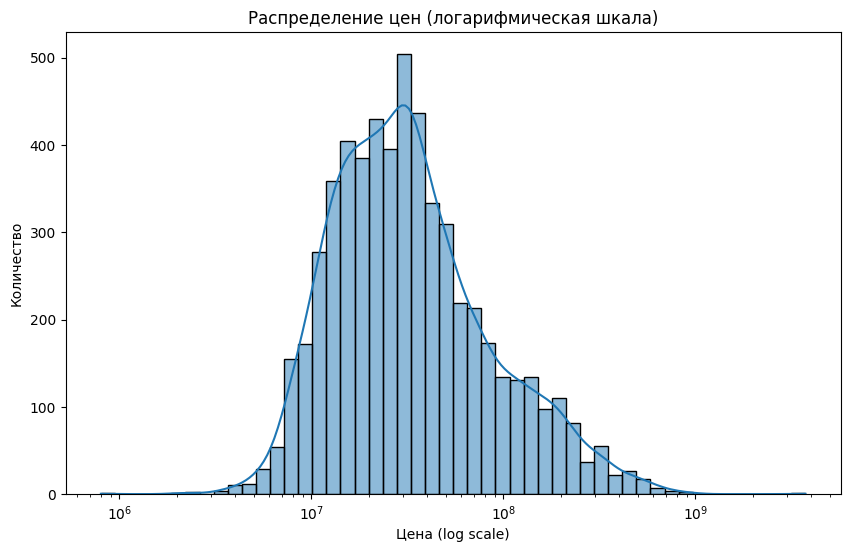

In [192]:
import pandas as pd
import plotly.figure_factory as ff

max_price = df['price'].max()

df_filtered = df[df['price'] != max_price].copy()

hist_data = [df_filtered['price']]
group_labels = ['Price (without max)']

fig = ff.create_distplot(
    hist_data, 
    group_labels, 
    bin_size=1000000,
    curve_type='kde'
)

fig.update_layout(
    title='Распределение цен (без самого большого значения)',
    xaxis_title='Цена',
    yaxis_title='Плотность',
    width=1100, 
    height=800 
)

fig.show()

df = df.dropna(subset=['price'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True, bins=50, log_scale=True)
plt.title('Распределение цен (логарифмическая шкала)')
plt.xlabel('Цена (log scale)')
plt.ylabel('Количество')
plt.show()


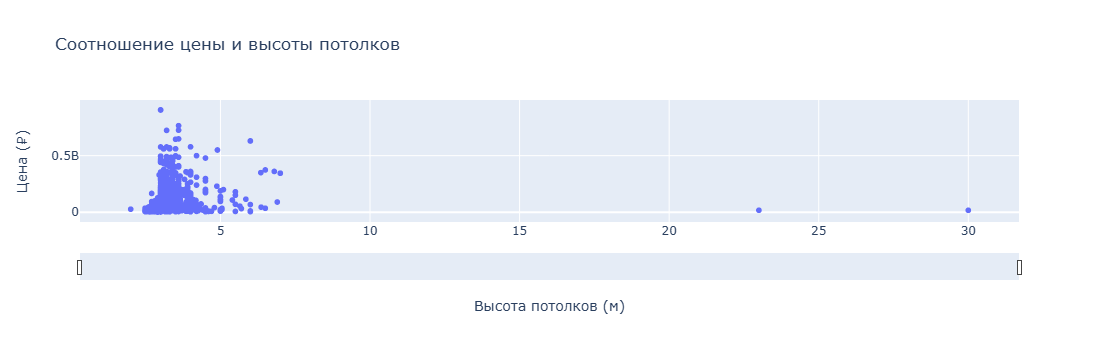

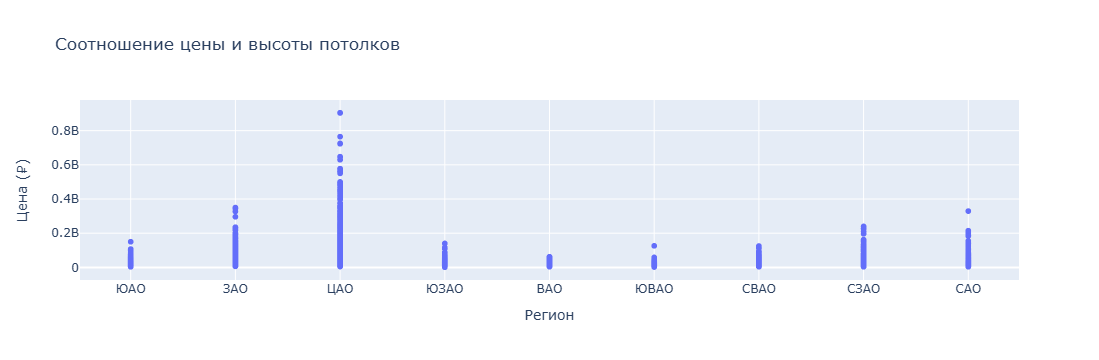

In [194]:
df_cleaned = df.dropna(subset=['price', 'ceiling_height'])


fig = px.scatter(
    df_cleaned,
    x='ceiling_height',
    y='price',
    title='Соотношение цены и высоты потолков',
    labels={'ceiling_height': 'Высота потолков (м)', 'price': 'Цена (₽)'},
    template='plotly',
    height=600
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()

df_cleaned = df.dropna(subset=['price', 'ceiling_height'])

fig = px.scatter(
    df_cleaned,
    x='region_of_moscow',
    y='price',
    title='Соотношение цены и высоты потолков',
    labels={'region_of_moscow': 'Регион', 'price': 'Цена (₽)'},
    template='plotly',
    height=600
)

fig.show()

In [ ]:
# ЗАВИСИМОСТЬ ЦЕНЫ ОТ ПЛОЩАДИ

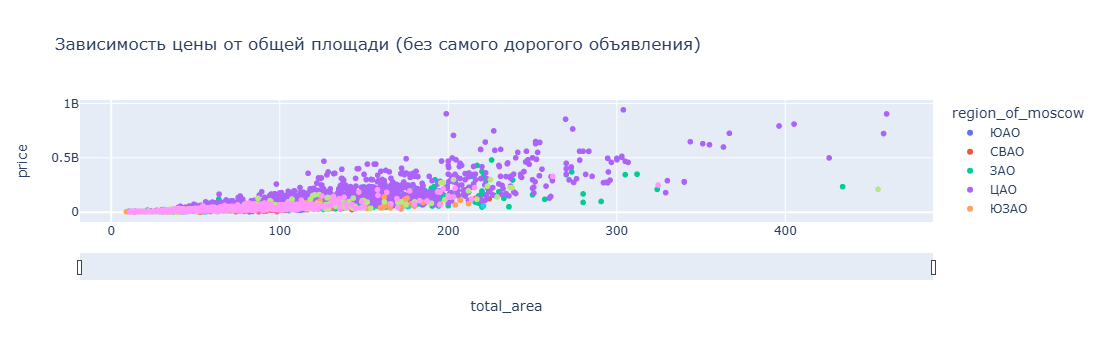

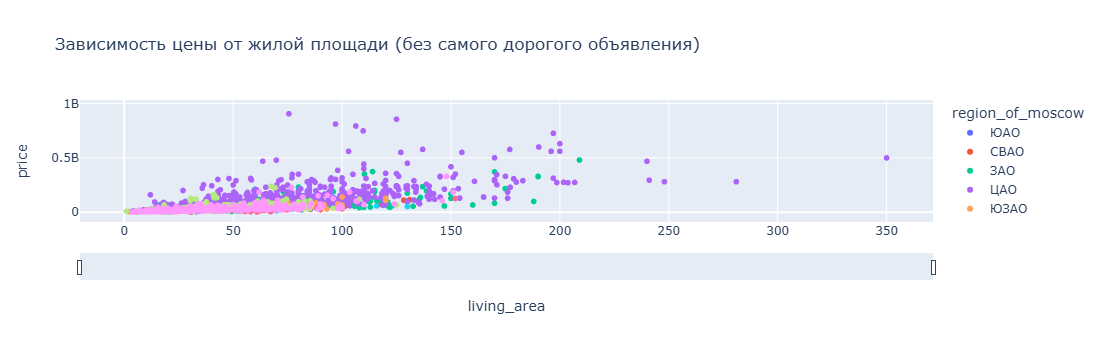

In [146]:
import plotly.express as px

max_price = df['price'].max()
df_filtered = df[df['price'] != max_price].copy()

fig = px.scatter(
    df_filtered, 
    x='total_area', 
    y='price', 
    color='region_of_moscow',
    title='Зависимость цены от общей площади (без самого дорогого объявления)',
    height=500
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()

fig = px.scatter(
    df_filtered, 
    x='living_area', 
    y='price', 
    color='region_of_moscow',
    title='Зависимость цены от жилой площади (без самого дорогого объявления)',
    height=500
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()


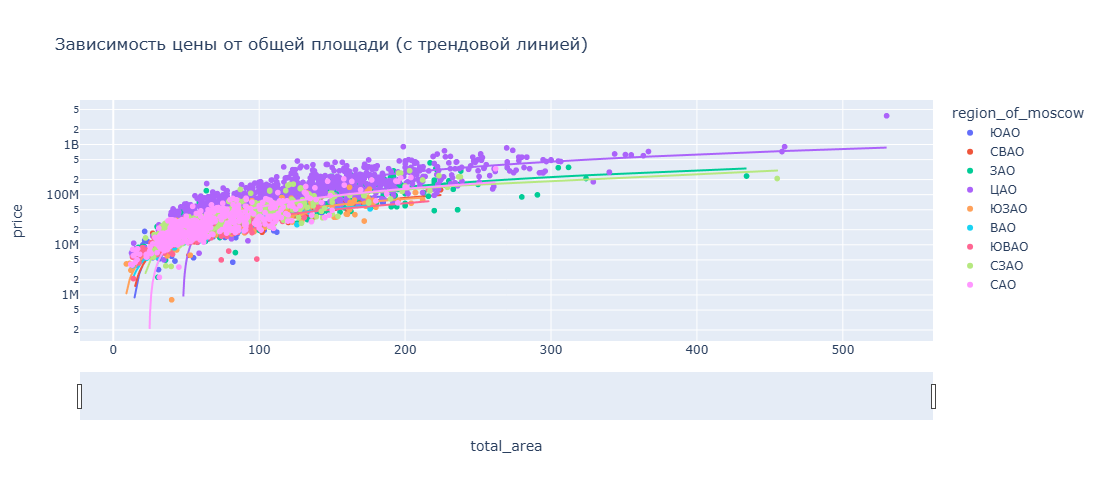

In [198]:
fig = px.scatter(
    df, 
    x='total_area', 
    y='price', 
    color='region_of_moscow',
    hover_data=['living_area', 'floor', 'number_of_rooms'],
    trendline='ols',
    title='Зависимость цены от общей площади (с трендовой линией)',
    height=500
)

fig.update_yaxes(type='log')
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)
fig.show()


In [ ]:
# ЦЕНА ЗА КВАДРАТНЫЙ МЕТР

In [128]:
df['price_per_sqm'] = df['price'] / df['total_area']
df.head()


price  min_to_metro region_of_moscow  total_area  living_area  floor  \
0  31633073.0          24.0              ЮАО        64.2         32.4   11.0   
1  29293000.0           9.0             СВАО        78.1          NaN    9.0   
2  30349669.0           5.0              ЮАО        72.4         33.6    3.0   
3  31845511.0          19.0              ЮАО        69.2          NaN    2.0   
4  38810000.0          27.0              ЗАО        66.9         24.8    9.0   

   number_of_floors  construction_year  is_new  is_apartments  ceiling_height  \
0              16.0             2023.0     1.0            0.0            3.15   
1              27.0             2022.0     1.0            0.0             NaN   
2              24.0             2023.0     1.0            0.0            3.15   
3              12.0             2024.0     1.0            0.0            2.97   
4              14.0             2023.0     1.0            0.0            3.00   

   number_of_rooms                                      link  price_per_sqm  
0                2  https://www.cian.ru/sale/flat/293204033/  492726.993769  
1                2  https://www.cian.ru/sale/flat/294033524/  375070.422535  
2                2  https://www.cian.ru/sale/flat/300712697/  419194.323204  
3                2  https://www.cian.ru/sale/flat/300228448/  460195.245665  
4                2  https://www.cian.ru/sale/flat/299262105/  580119.581465

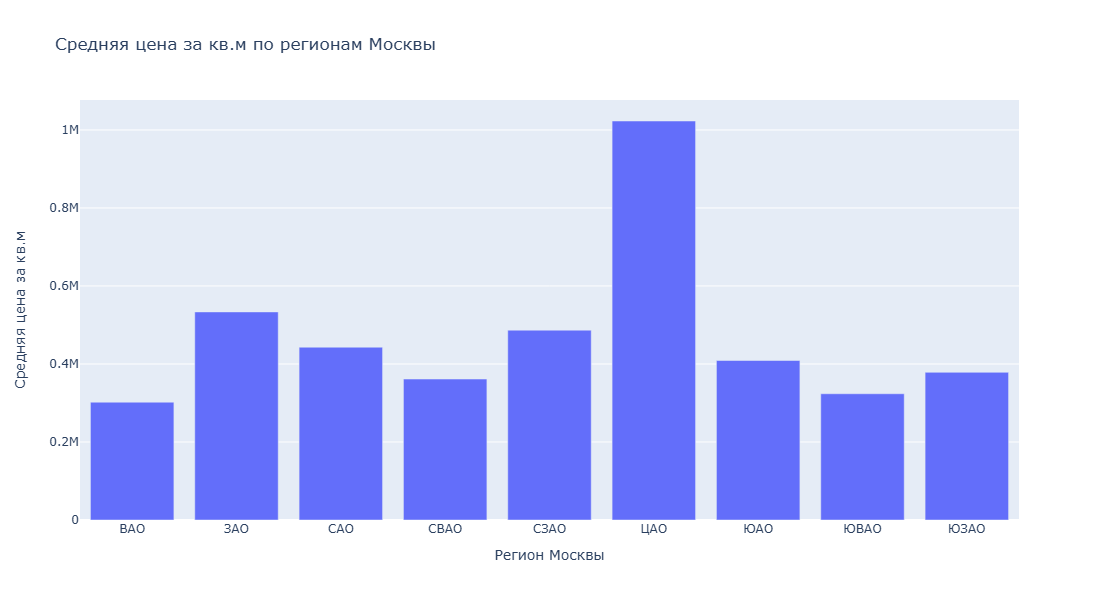

In [129]:
import pandas as pd
import plotly.express as px

avg_price_per_sqm = df.groupby('region_of_moscow')['price_per_sqm'].mean().reset_index()

fig = px.bar(
    avg_price_per_sqm,
    x='region_of_moscow',
    y='price_per_sqm',
    title='Средняя цена за кв.м по регионам Москвы',
    labels={'region_of_moscow': 'Регион Москвы', 'price_per_sqm': 'Средняя цена за кв.м'},
    height=600
)
fig.show()


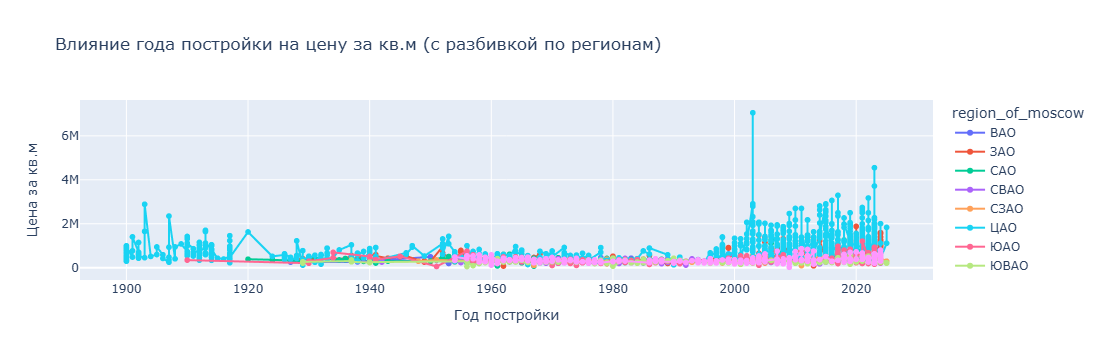

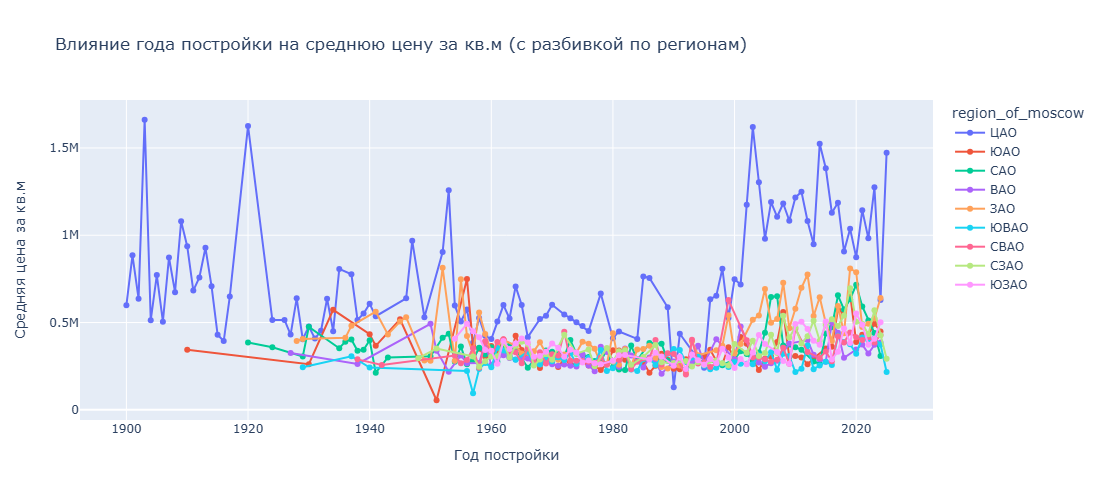

In [196]:
import pandas as pd
import plotly.express as px

df['price_per_sqm'] = df['price'] / df['total_area']

df_sorted = df.sort_values(['region_of_moscow', 'construction_year'])

fig_line = px.line(
    df_sorted,
    x='construction_year',
    y='price_per_sqm',
    color='region_of_moscow',
    markers=True,
    title='Влияние года постройки на цену за кв.м (с разбивкой по регионам)',
    height=500
)

fig_line.update_layout(
    xaxis_title='Год постройки',
    yaxis_title='Цена за кв.м'
)

fig_line.show()

df['price_per_sqm'] = df['price'] / df['total_area']

df_grouped = df.groupby(['construction_year', 'region_of_moscow'], as_index=False).agg(
    avg_price_per_sqm=('price_per_sqm', 'mean')
)

fig_line = px.line(
    df_grouped,
    x='construction_year',
    y='avg_price_per_sqm',
    color='region_of_moscow',
    markers=True,
    title='Влияние года постройки на среднюю цену за кв.м (с разбивкой по регионам)',
    height=500
)
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        )
    )
)

fig_line.update_layout(
    xaxis_title='Год постройки',
    yaxis_title='Средняя цена за кв.м'
)

fig_line.show()


In [ ]:
# ВЛИЯНИЕ БЛИЗОСТИ К МЕТРО

C:\Users\Аскар\AppData\Local\Temp\ipykernel_7652\3658344706.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



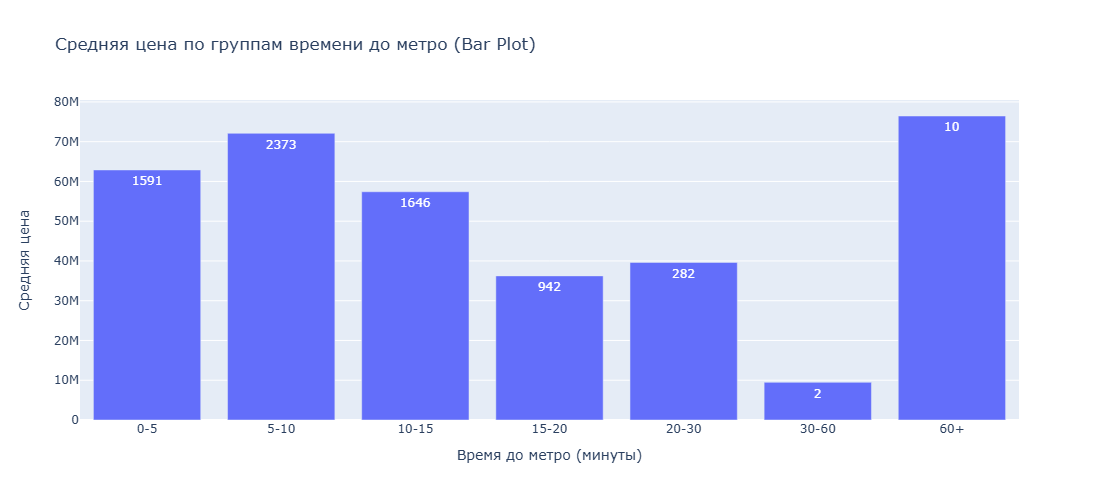

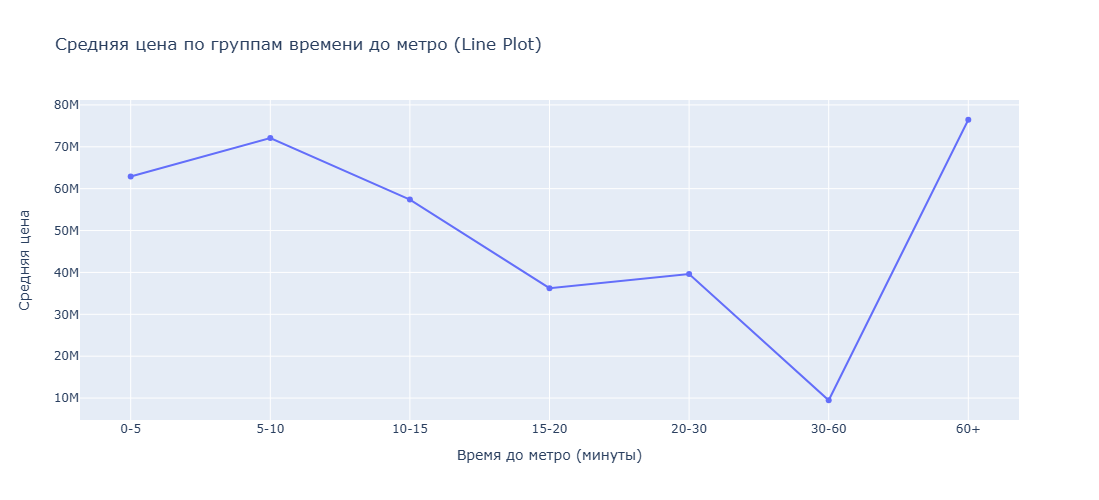

In [135]:
import pandas as pd
import plotly.express as px

bins = [0, 5, 10, 15, 20, 30, 60, float('inf')]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-60", "60+"]

df['min_to_metro_bin'] = pd.cut(
    df['min_to_metro'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)


df_grouped = df.groupby('min_to_metro_bin', as_index=False).agg(
    mean_price=('price', 'mean'),
    count=('price', 'count')
)

fig = px.bar(
    df_grouped,
    x='min_to_metro_bin', 
    y='mean_price',
    title='Средняя цена по группам времени до метро (Bar Plot)',
    text='count'
)

fig.update_layout(
    xaxis_title='Время до метро (минуты)',
    yaxis_title='Средняя цена',
    height=500
)

fig.show()

fig_line = px.line(
    df_grouped,
    x='min_to_metro_bin',
    y='mean_price',
    markers=True,
    title='Средняя цена по группам времени до метро (Line Plot)'
)

fig_line.update_layout(
    xaxis_title='Время до метро (минуты)',
    yaxis_title='Средняя цена',
    height=500
)

fig_line.show()


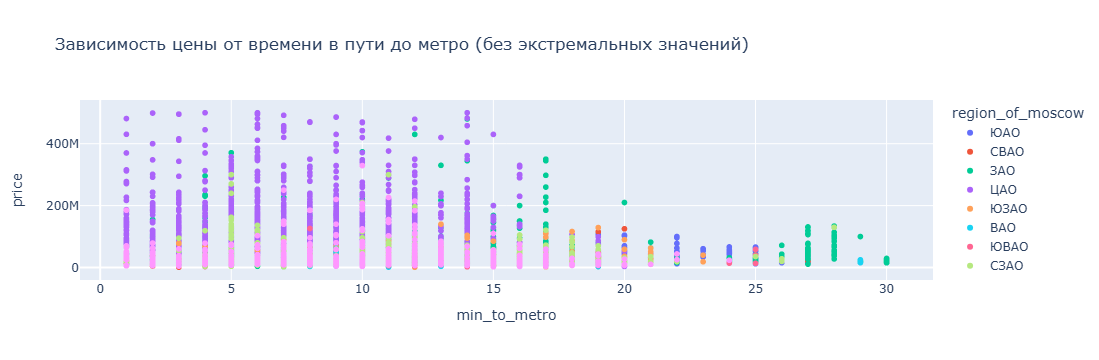

In [139]:
df_filtered = df[(df['min_to_metro'] <= 40) & (df['price'] <= 500000000)]

fig = px.scatter(
    df_filtered,
    x='min_to_metro',
    y='price',
    color='region_of_moscow',
    title='Зависимость цены от времени в пути до метро (без экстремальных значений)',
    height=600
)
fig.show()


In [ ]:
# АНАЛИЗ ЭТАЖНОСТИ

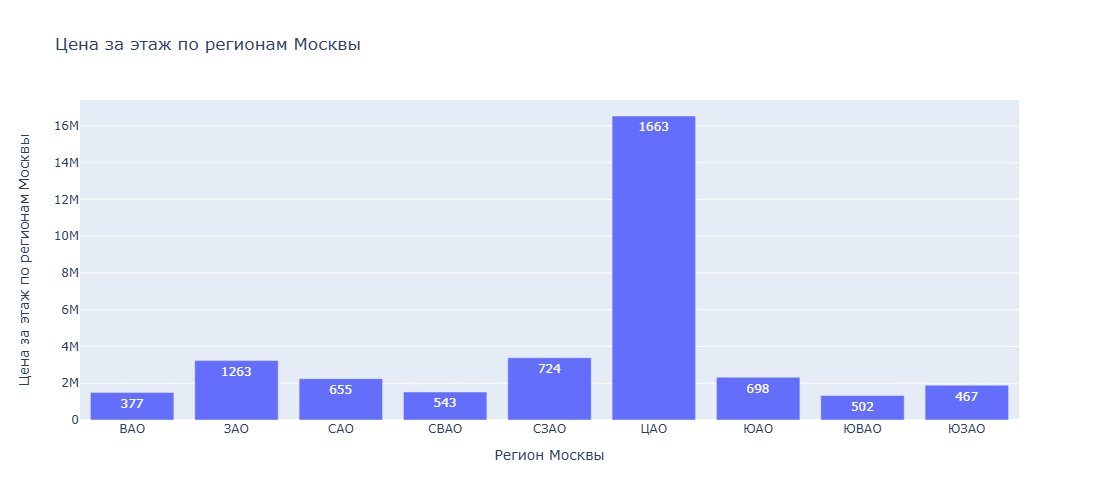

In [161]:
df['price_per_floor'] = df['price'] / df['number_of_floors']

df_region = df.groupby('region_of_moscow', as_index=False).agg(
    avg_price_per_floor=('price_per_floor', 'mean'),
    count=('price', 'count')
)

fig_region = px.bar(
    df_region,
    x='region_of_moscow',
    y='avg_price_per_floor',
    text='count',
    title='Цена за этаж по регионам Москвы',
    labels={'region_of_moscow': 'Регион Москвы', 'avg_price_per_floor': 'Цена за этаж по регионам Москвы'},
    height=500
)

fig_region.update_layout(xaxis=dict(type='category'))
fig_region.show()


C:\Users\Аскар\AppData\Local\Temp\ipykernel_7652\1566189776.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



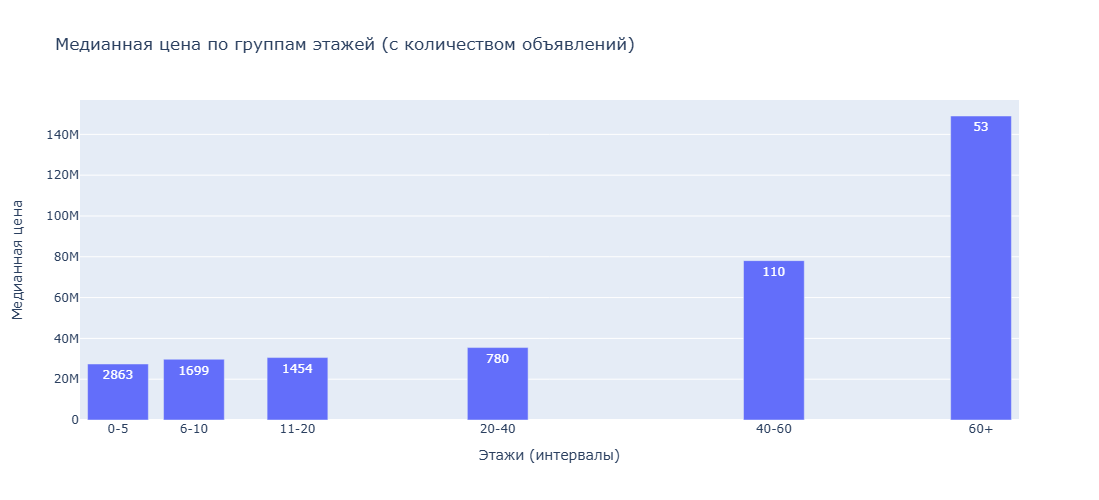

In [163]:
import pandas as pd
import plotly.express as px
bins = [0, 5, 10, 20, 40, 60, float('inf')]
labels = ["0-5", "6-10", "11-20", "20-40", "40-60", "60+"]

df['floor_bin'] = pd.cut(
    df['floor'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

bin_midpoints = {
    "0-5": 2.5,
    "6-10": 8,     # (6+10)/2 = 8
    "11-20": 15.5, # (11+20)/2 = 15.5
    "20-40": 30,   # (20+40)/2 = 30
    "40-60": 50,   # (40+60)/2 = 50
    "60+": 65
}

df_floor_grouped = df.groupby('floor_bin', as_index=False).agg(
    median_price=('price', 'median'),
    count=('price', 'count')
)

df_floor_grouped['floor_bin_num'] = df_floor_grouped['floor_bin'].map(bin_midpoints)

fig = px.bar(
    df_floor_grouped,
    x='floor_bin_num',
    y='median_price',
    text='count',
    title='Медианная цена по группам этажей (с количеством объявлений)',
    labels={'floor_bin_num': 'Этажи (интервалы)', 'median_price': 'Медианная цена'},
    height=500
)

fig.update_layout(
    # bargap=0,
    xaxis=dict(
        tickmode='array',
        tickvals=list(bin_midpoints.values()),
        ticktext=list(bin_midpoints.keys()),
        # rangeslider=dict(visible=True)
    )
)

fig.show()


In [ ]:
#ВЛИЯНИЕ ГОДА ПОСТРОЙКИ

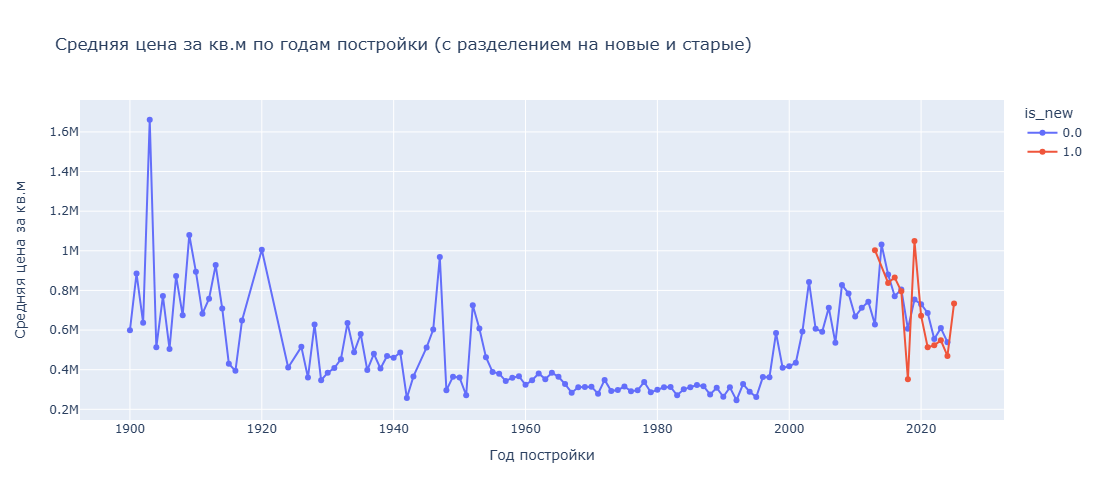

In [170]:
df['price_per_sqm'] = df['price'] / df['total_area']

# ИСКЛЮЧЕНИЕ АНОМАЛЬНЫХ ЗНАЧЕНИЙ:
# df = df[(df['construction_year'] >= 1900) & (df['construction_year'] <= 2025)]

df_grouped = df.groupby(['construction_year', 'is_new'], as_index=False).agg(
    avg_price_per_sqm=('price_per_sqm', 'mean'),
    count=('price', 'count')
)

fig_line = px.line(
    df_grouped.sort_values('construction_year'),
    x='construction_year',
    y='avg_price_per_sqm',
    color='is_new',
    markers=True,
    title='Средняя цена за кв.м по годам постройки (с разделением на новые и старые)',
    height=500
)

fig_line.update_layout(
    xaxis_title='Год постройки',
    yaxis_title='Средняя цена за кв.м'
)

fig_line.show()


In [ ]:
#АНАЛИЗ ПО КОЛИЧЕСТВУ КОМНАТ

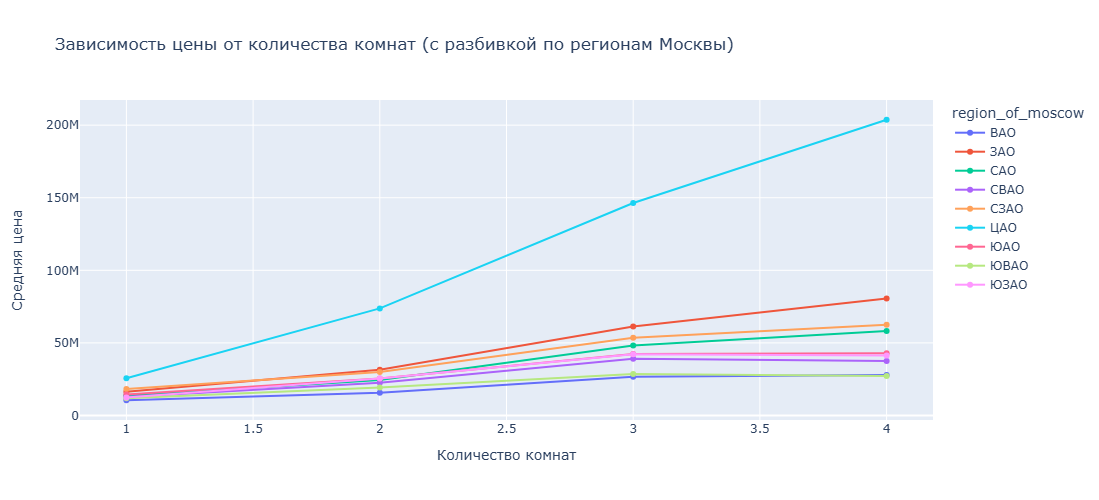

In [178]:
import pandas as pd
import plotly.express as px

df_grouped = df.groupby(['number_of_rooms', 'region_of_moscow'], as_index=False).agg(
    avg_price=('price', 'mean'),
    count=('price', 'count')
)

fig = px.line(
    df_grouped.sort_values('number_of_rooms'),
    x='number_of_rooms',
    y='avg_price',
    color='region_of_moscow',
    markers=True,
    title='Зависимость цены от количества комнат (с разбивкой по регионам Москвы)',
    height=500,
    hover_data=['count']
)

fig.update_layout(
    xaxis_title='Количество комнат',
    yaxis_title='Средняя цена'
)

fig.show()


In [ ]:
#ОТНОШЕНИЕ ЖИЛОЙ ПЛОЩАДИ К ОБЩЕЙ

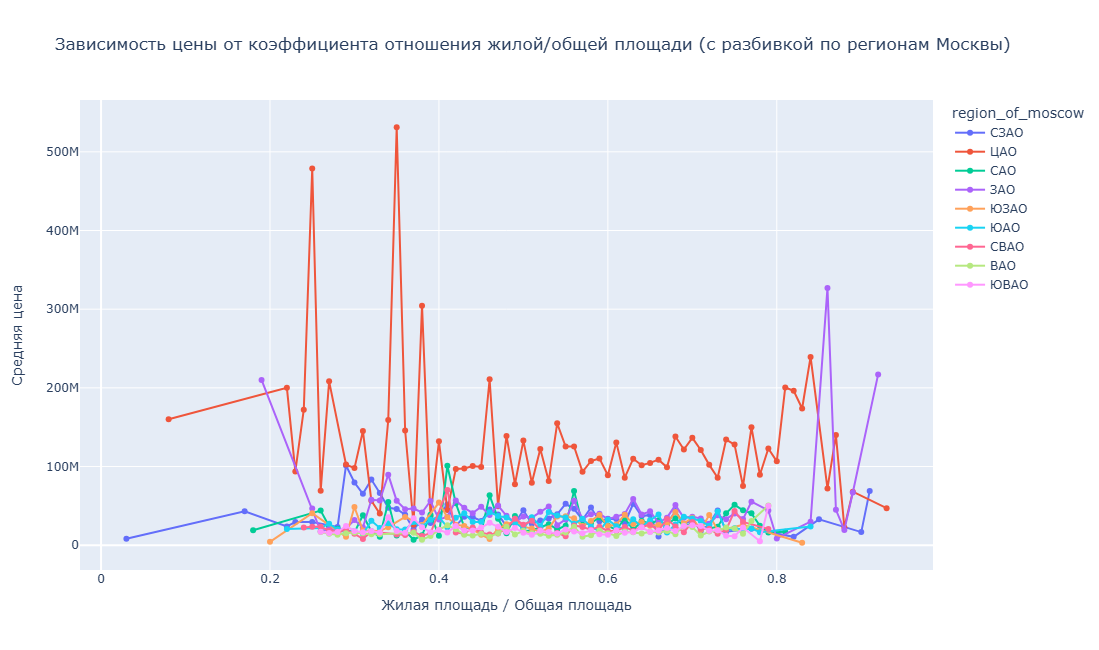

In [197]:
import pandas as pd
import plotly.express as px

df['ratio'] = df['living_area'] / df['total_area']

df['ratio_round'] = df['ratio'].round(2)

df_grouped = df.groupby(['ratio_round', 'region_of_moscow'], as_index=False).agg(
    avg_price=('price', 'mean'),
    count=('price', 'count')
)

fig = px.line(
    df_grouped.sort_values('ratio_round'),
    x='ratio_round',
    y='avg_price',
    color='region_of_moscow',
    markers=True,
    title='Зависимость цены от коэффициента отношения жилой/общей площади (с разбивкой по регионам Москвы)',
    height=650,
    hover_data=['count']
)

fig.update_layout(
    xaxis_title='Жилая площадь / Общая площадь',
    yaxis_title='Средняя цена'
)

fig.show()


In [ ]:
#ПРИКОЛЬНЫЙ ГРАФИК

In [190]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import VBox, interactive_output

regions = ["All"] + sorted(df["region_of_moscow"].dropna().astype(str).unique().tolist())

rooms_min = int(df["number_of_rooms"].min())
rooms_max = int(df["number_of_rooms"].max())

is_new_options = ["All", 0, 1]

def update_dashboard(selected_region, rooms_range, selected_is_new):
    dff = df.copy()

    if selected_region != "All":
        dff = dff[dff["region_of_moscow"].astype(str) == selected_region]
    
    dff = dff[(dff["number_of_rooms"] >= rooms_range[0]) & (dff["number_of_rooms"] <= rooms_range[1])]
    
    if selected_is_new != "All":
        dff = dff[dff["is_new"] == selected_is_new]
    
    dff = dff.dropna(subset=["living_area", "total_area", "price"])
    
    fig = px.scatter(
        dff,
        x="total_area",
        y="price",
        color="region_of_moscow",
        size="living_area",
        hover_data=["number_of_rooms", "is_new"],
        height=500,
        title="Зависимость цены от общей площади"
    )
    fig.update_layout(
        xaxis_title="Общая площадь",
        yaxis_title="Цена"
    )
    fig.show()

region_widget = widgets.Dropdown(
    options=regions,
    value="All",
    description="Регион:",
    disabled=False,
)

rooms_widget = widgets.IntRangeSlider(
    value=[rooms_min, rooms_max],
    min=rooms_min,
    max=rooms_max,
    step=1,
    description='Комнаты:',
    continuous_update=False
)

is_new_widget = widgets.Dropdown(
    options=is_new_options,
    value="All",
    description="Новостройка:",
    disabled=False,
)

ui = VBox([region_widget, rooms_widget, is_new_widget])

out = interactive_output(update_dashboard, {
    "selected_region": region_widget,
    "rooms_range": rooms_widget,
    "selected_is_new": is_new_widget
})

display(ui, out)


Output()

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# # URL of the listing
# url = "https://www.cian.ru/sale/flat/300427641/"
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
# }

# response = requests.get(url, headers=headers)
# soup = BeautifulSoup(response.text, "html.parser")

# # Corrected data extraction
# price = soup.select_one('.a10a3f92e9--tooltip-value--ZsSAf').text.strip().replace(' ', '').replace('$', '')
# min_to_metro = soup.select_one('.a10a3f92e9--underground_time--YvrcI').text.strip().split()[0]  # Extract '10'
# underground_station = soup.select_one('.a10a3f92e9--underground_link--VnUVj').text.strip()
# region_of_moscow = soup.select_one('[data-name="AddressItem"]').text.strip()

# # Find all <p> tags with the target class
# total_area_tags = soup.find_all("p", class_="a10a3f92e9--color_text-primary-default--vSRPB a10a3f92e9--lineHeight_6u--cedXD a10a3f92e9--fontWeight_normal--JEG_c a10a3f92e9--fontSize_16px--QNYmt a10a3f92e9--display_block--KYb25 a10a3f92e9--text--e4SBY a10a3f92e9--text_letterSpacing__0--cQxU5")

# # Filter to find the correct one
# total_area = None
# for tag in total_area_tags:
#     if tag.text.strip().isdigit():  # Check if the text is a numeric value
#         total_area = tag.text.strip()
#         break  # Exit loop once the correct tag is found

# # Locate the container with "Жилая площадь"
# living_area_label = soup.find(string="Жилая площадь")
# if living_area_label:
#     # Navigate to the parent element and locate the corresponding <p> tag
#     parent = living_area_label.find_parent("p")
#     if parent:
#         living_area = parent.find_next_sibling("p").text.strip()
#     else:
#         living_area = None
# else:
#     living_area = None

# print("Extracted Living Area:", living_area)

# floor = soup.select_one('.a10a3f92e9--fontSize_16px--QNYmt').text.split(' из ')[0]  # Extract the first number
# number_of_floors = soup.select_one('.a10a3f92e9--fontSize_16px--QNYmt').text.split(' из ')[0]  # Extract the second number
# construction_year = soup.select_one('.a10a3f92e9--fontSize_16px--QNYmt').text.strip()
# number_of_rooms = soup.select_one('.a10a3f92e9--title--vlZwT').text.split()[1].replace('-комн.', '')
# link = url

# # Creating a dictionary with the extracted data
# data = {
#     "price": price,
#     "min_to_metro": min_to_metro,
#     "underground_station": underground_station,
#     "region_of_moscow": region_of_moscow,
#     "total_area": total_area,
#     "living_area": living_area,
#     "floor": floor,
#     "number_of_floors": number_of_floors,
#     "construction_year": construction_year,
#     "number_of_rooms": number_of_rooms,
#     "link": link,
# }

# print(data)


In [ ]:
# import requests
# from bs4 import BeautifulSoup

# # URL of the listing
# url = "https://www.cian.ru/sale/flat/300427641/"
# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
# }

# response = requests.get(url, headers=headers)
# soup = BeautifulSoup(response.text, "html.parser")

# # Corrected data extraction
# price = soup.select_one('.a10a3f92e9--tooltip-value--ZsSAf').text.strip().replace(' ', '').replace('$', '')
# min_to_metro = soup.select_one('.a10a3f92e9--underground_time--YvrcI').text.strip().split()[0]  # Extract '10'
# underground_station = soup.select_one('.a10a3f92e9--underground_link--VnUVj').text.strip()
# region_of_moscow = soup.select_one('[data-name="AddressItem"]').text.strip()
# total_area = soup.select_one('.a10a3f92e9--text--e4SBY').text.strip()
# living_area = soup.select('.a10a3f92e9--text--e4SBY')[1].text.strip()
# floor = soup.select_one('.a10a3f92e9--fontSize_16px--QNYmt').text.split(' из ')[0]  # Extract the first number
# number_of_floors = soup.select_one('.a10a3f92e9--fontSize_16px--QNYmt').text.split(' из ')[0]  # Extract the second number
# construction_year = soup.select_one('.a10a3f92e9--fontSize_16px--QNYmt').text.strip()
# number_of_rooms = soup.select_one('.a10a3f92e9--title--vlZwT').text.split()[1].replace('-комн.', '')
# link = url

# # Creating a dictionary with the extracted data
# data = {
#     "price": price,
#     "min_to_metro": min_to_metro,
#     "underground_station": underground_station,
#     "region_of_moscow": region_of_moscow,
#     "total_area": total_area,
#     "living_area": living_area,
#     "floor": floor,
#     "number_of_floors": number_of_floors,
#     "construction_year": construction_year,
#     "number_of_rooms": number_of_rooms,
#     "link": link,
# }

# print(data)
